# Decision Tree (Fraud check)
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

## Importing libraries

In [36]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing

In [37]:
ls

 Volume in drive C is program files
 Volume Serial Number is 5C10-FCA7

 Directory of C:\Users\Sayali Hatwar\OneDrive\Desktop\Assignment files\DT assignment

19-01-2023  00:08    <DIR>          .
19-01-2023  00:08    <DIR>          ..
18-01-2023  20:10    <DIR>          .ipynb_checkpoints
19-01-2023  00:08         2,652,609 Assignment no. 14 - (company).ipynb
18-01-2023  20:26           831,664 Assignment no. 14 - (Fraud check).ipynb
12-12-2022  14:31            17,023 Company_Data.csv
12-12-2022  14:31            21,837 Fraud_check.csv
12-12-2022  14:31             1,377 problem statement(company data).txt
12-12-2022  14:31               460 Problem_statement(Fraudcheck).txt
               6 File(s)      3,524,970 bytes
               3 Dir(s)  116,820,795,392 bytes free


## Reading File

In [38]:
F1 = pd.read_csv('Fraud_check.csv')
F1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## EDA

In [39]:
F1.shape

(600, 6)

In [40]:
F1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [41]:
F1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [42]:
F1.value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
NO         Divorced        10329           140885           7                YES      1
YES        Married         21966           117250           20               YES      1
                           26679           79683            26               NO       1
                           26741           176050           20               NO       1
                           26793           162777           7                NO       1
                                                                                     ..
NO         Single          22054           91889            16               NO       1
                           22258           63622            17               NO       1
                           23884           111105           8                YES      1
                           24557           32450            19               YES      1
YES        Single          99619     

In [46]:
corr = F1.corr()
corr

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


## Visualization

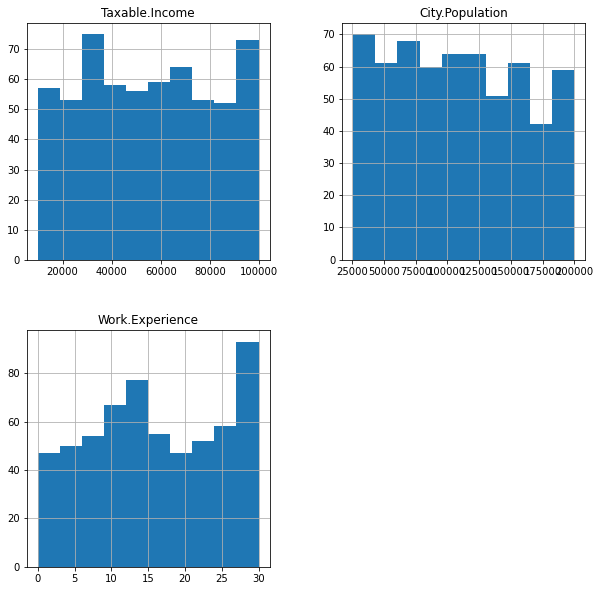

In [43]:
# Histogram for all columns
F1.hist(figsize=(10,10))
plt.show()

<AxesSubplot:>

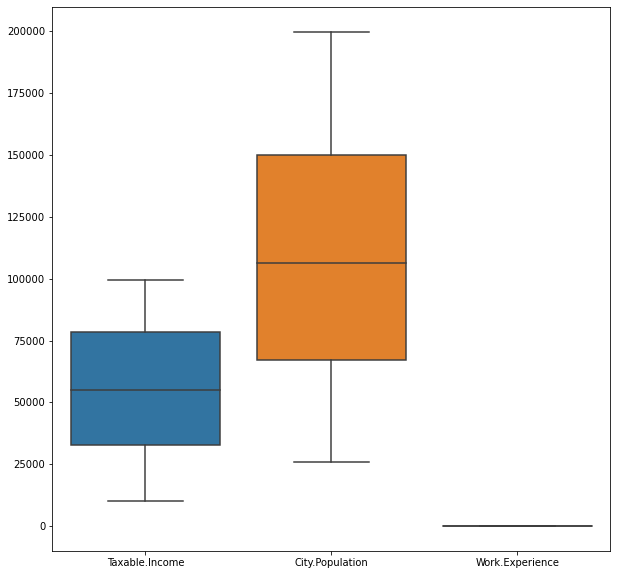

In [45]:
# Boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=F1)

<AxesSubplot:>

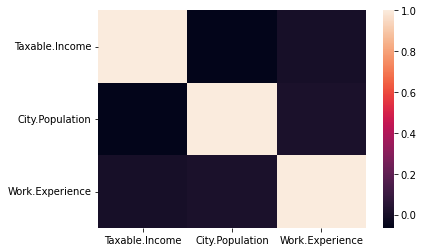

In [47]:
# Heatmap
sns.heatmap(corr)

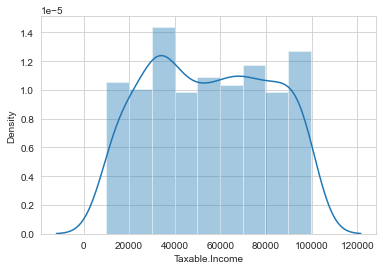

In [49]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.distplot(F1['Taxable.Income'],kde=True)
plt.show()

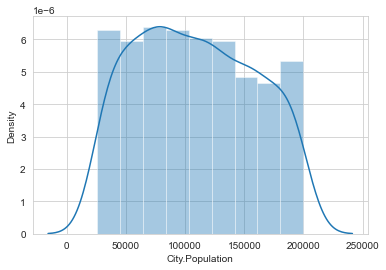

In [50]:
sns.set_style('whitegrid')
sns.distplot(F1['City.Population'],kde=True)
plt.show()

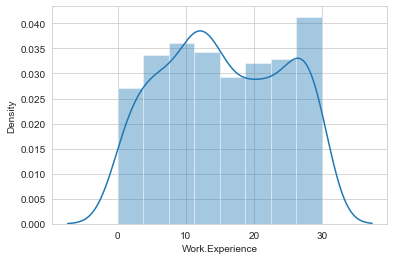

In [51]:
sns.set_style('whitegrid')
sns.distplot(F1['Work.Experience'],kde=True)
plt.show()

## Data Preprocessing

In [11]:
label_names=['Risk', 'No Risk']

In [12]:
F1['Fraud_data']=pd.cut(F1['Taxable.Income'],bins = [0,30000,1000000],labels=label_names,include_lowest = True)
F1[['Taxable.Income','Fraud_data']].head(10)

,Taxable.Income,Fraud_data
0,68833,No Risk
1,33700,No Risk
2,36925,No Risk
3,50190,No Risk
4,81002,No Risk
5,33329,No Risk
6,83357,No Risk
7,62774,No Risk
8,83519,No Risk
9,98152,No Risk


In [13]:
np.unique(F1['Fraud_data'])

array(['No Risk', 'Risk'], dtype=object)

In [14]:
F1['Fraud_data'].value_counts()

No Risk    476
Risk       124
Name: Fraud_data, dtype: int64

## Applying Label Encoder

In [15]:
label_encoder = preprocessing.LabelEncoder()

In [16]:
F1['Undergrad']= label_encoder.fit_transform(F1['Undergrad']) 
F1['Marital.Status'] =label_encoder.fit_transform(F1['Marital.Status'])
F1['Urban']=label_encoder.fit_transform(F1['Urban'])
F1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_data
0,0,2,68833,50047,10,1,No Risk
1,1,0,33700,134075,18,1,No Risk
2,0,1,36925,160205,30,1,No Risk
3,1,2,50190,193264,15,1,No Risk
4,0,1,81002,27533,28,0,No Risk
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,No Risk
596,1,0,69967,55369,2,1,No Risk
597,0,0,47334,154058,0,1,No Risk
598,1,1,98592,180083,17,0,No Risk


In [17]:
F1['Undergrad'].value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

In [18]:
F1['Marital.Status'].value_counts()

2    217
1    194
0    189
Name: Marital.Status, dtype: int64

In [19]:
F1['Urban'].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [20]:
F1['Fraud_data'].value_counts()

No Risk    476
Risk       124
Name: Fraud_data, dtype: int64

In [21]:
F1.sample()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_data
115,1,0,79357,78251,21,1,No Risk


## Splitting Input and Output data

In [22]:
# Input data
array = F1
X = array.iloc[:,:-1]
X.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [23]:
# Output data
Y = array.iloc[:,-1]
Y.head()

0    No Risk
1    No Risk
2    No Risk
3    No Risk
4    No Risk
Name: Fraud_data, dtype: category
Categories (2, object): ['Risk' < 'No Risk']

## Splitting train and test data

In [24]:
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=15)

In [25]:
x_train.shape,x_train.shape

((480, 6), (480, 6))

In [26]:
y_test.shape,y_train.shape

((120,), (480,))

## Building Decision Tree model using 'gini' criteria

In [27]:
model1 = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=5)
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [28]:
pred1 = model1.predict(x_test)

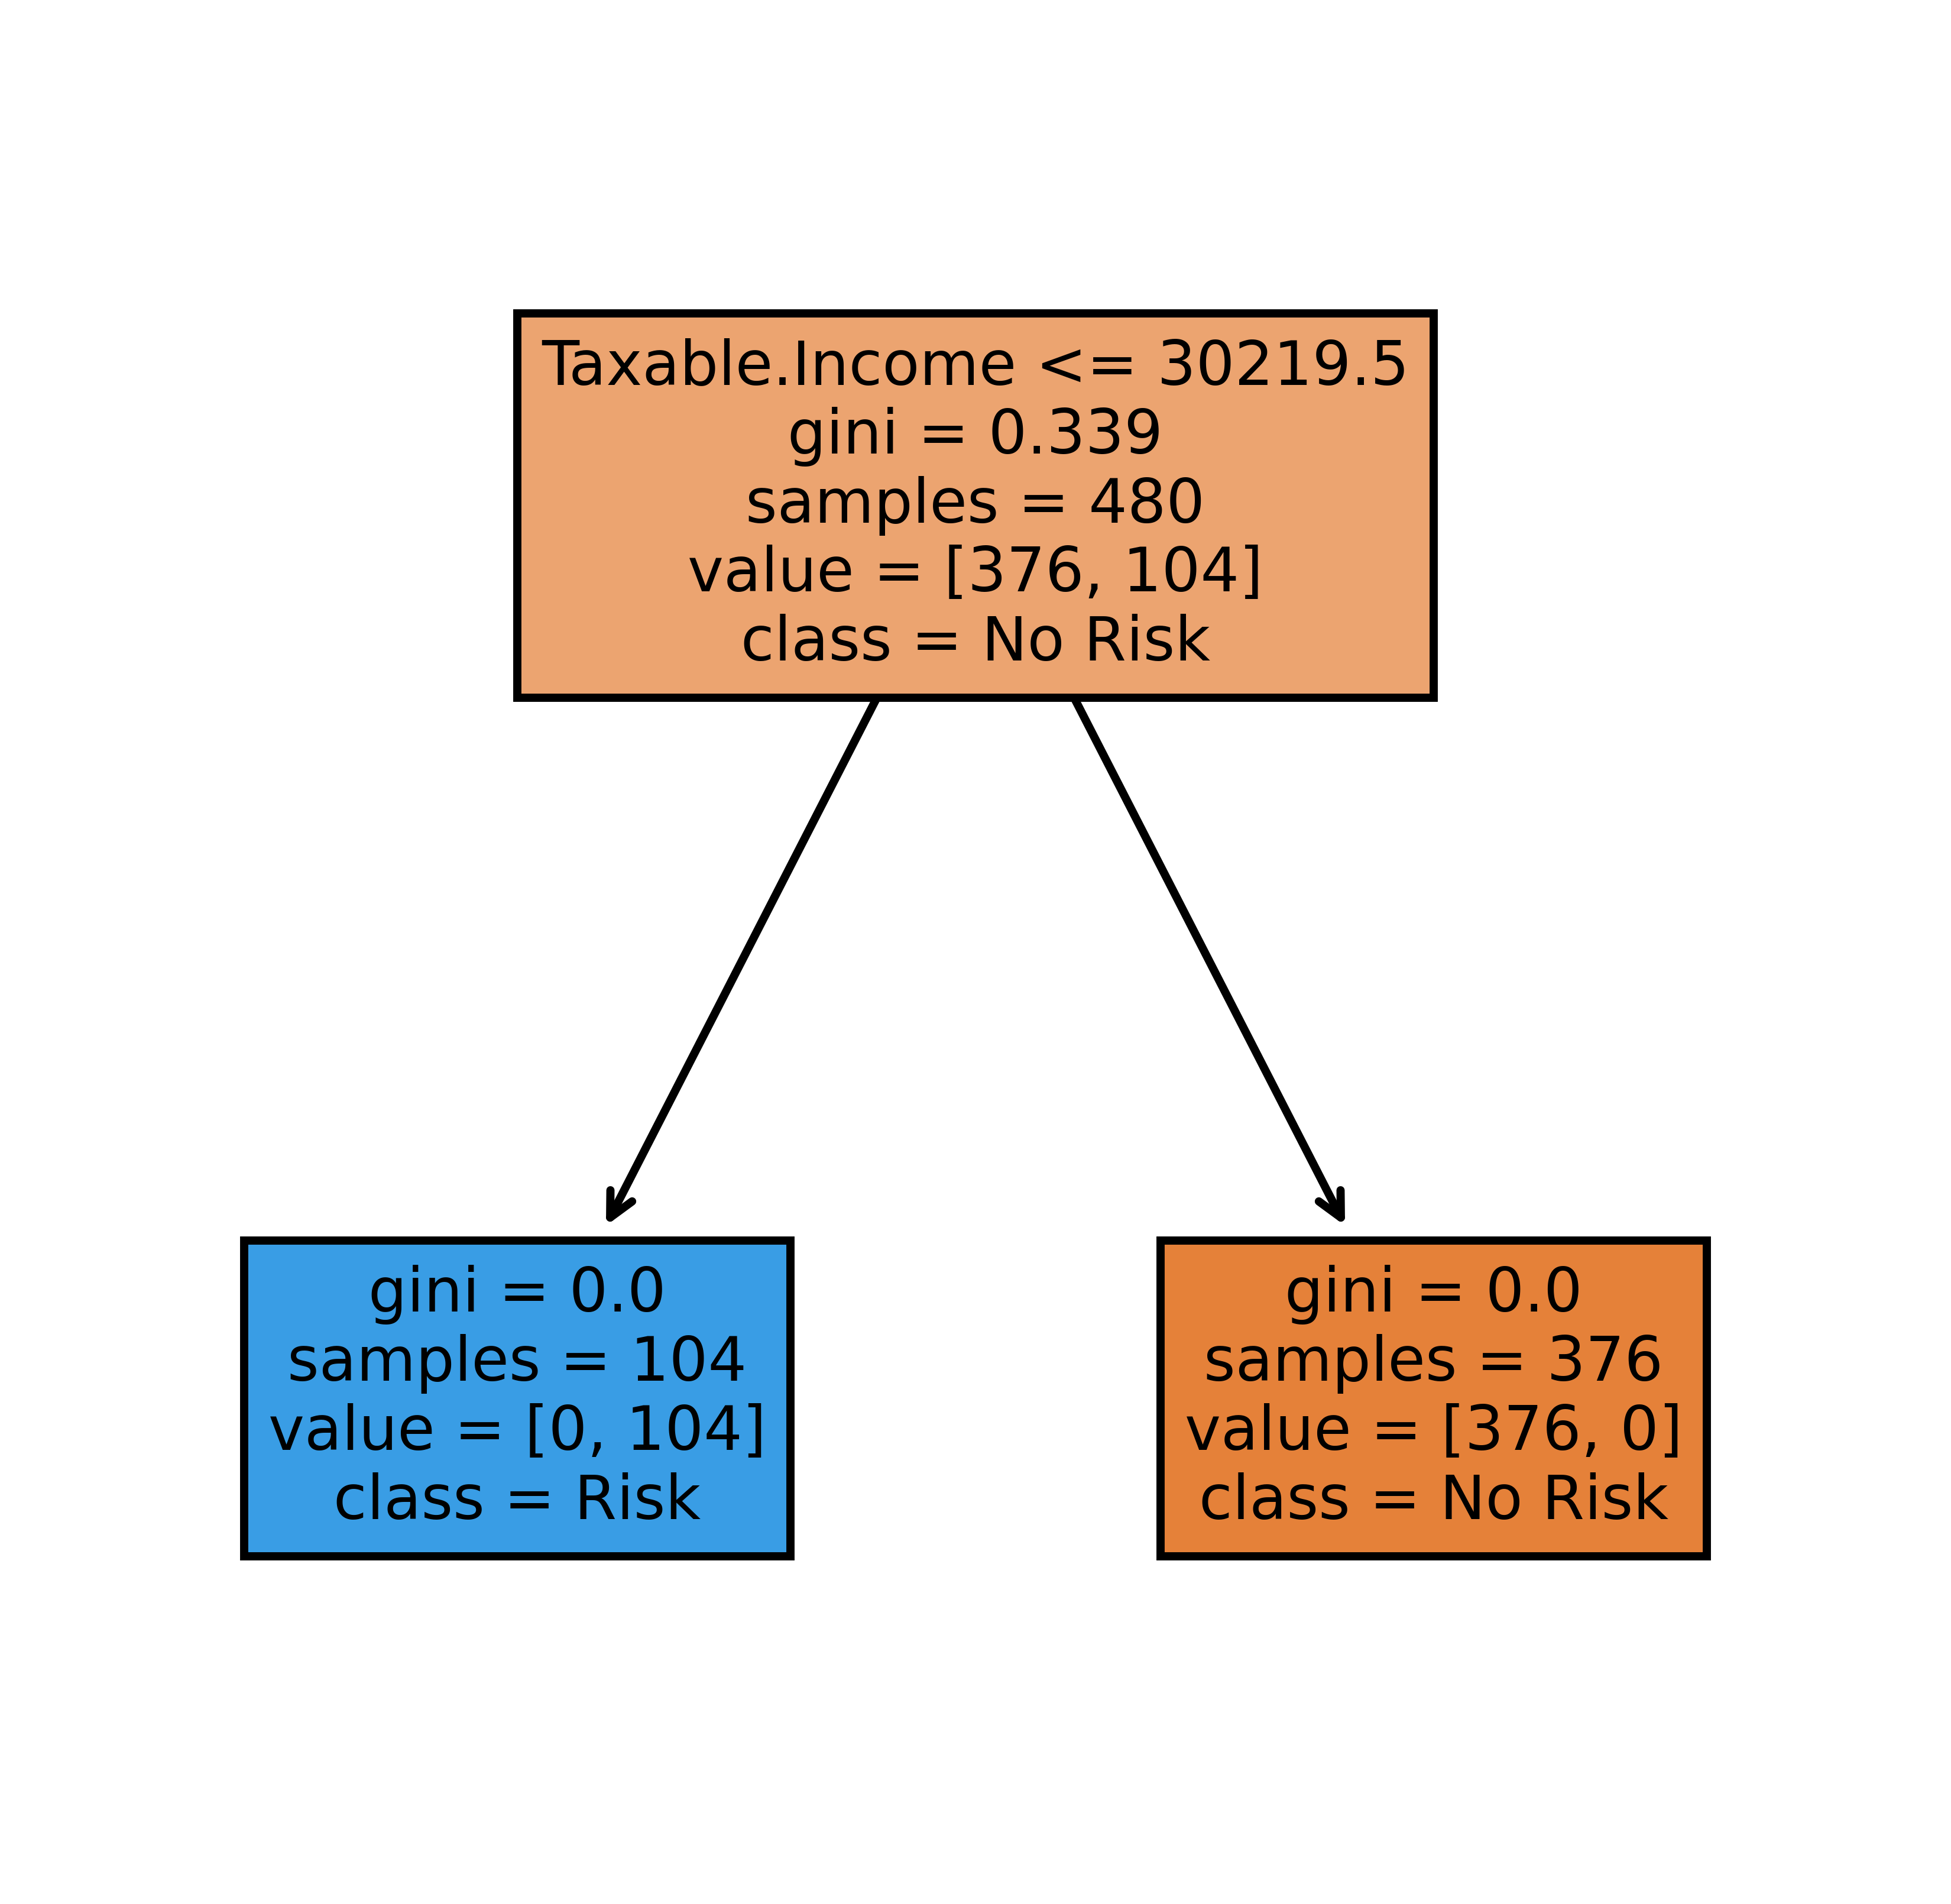

In [29]:
fn = ['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['No Risk', 'Risk']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize = (4,4), dpi=1000)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

## Accuracy

In [30]:
# Accuracy using 'gini' criteria
print(classification_report(pred1,y_test))
print('='*60)
print('Accuracy is :',metrics.accuracy_score(pred1,y_test))
print('='*60)
print('Confusion Matrix :',confusion_matrix(pred1,y_test))
print('='*60)

              precision    recall  f1-score   support

     No Risk       0.99      1.00      0.99        99
        Risk       1.00      0.95      0.98        21

    accuracy                           0.99       120
   macro avg       0.99      0.98      0.99       120
weighted avg       0.99      0.99      0.99       120

Accuracy is : 0.9916666666666667
Confusion Matrix : [[99  0]
 [ 1 20]]


## Building Decisition Tree using 'entropy' criteria

In [32]:
model2 = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=5)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5)

In [33]:
pred2 = model2.predict(x_test)

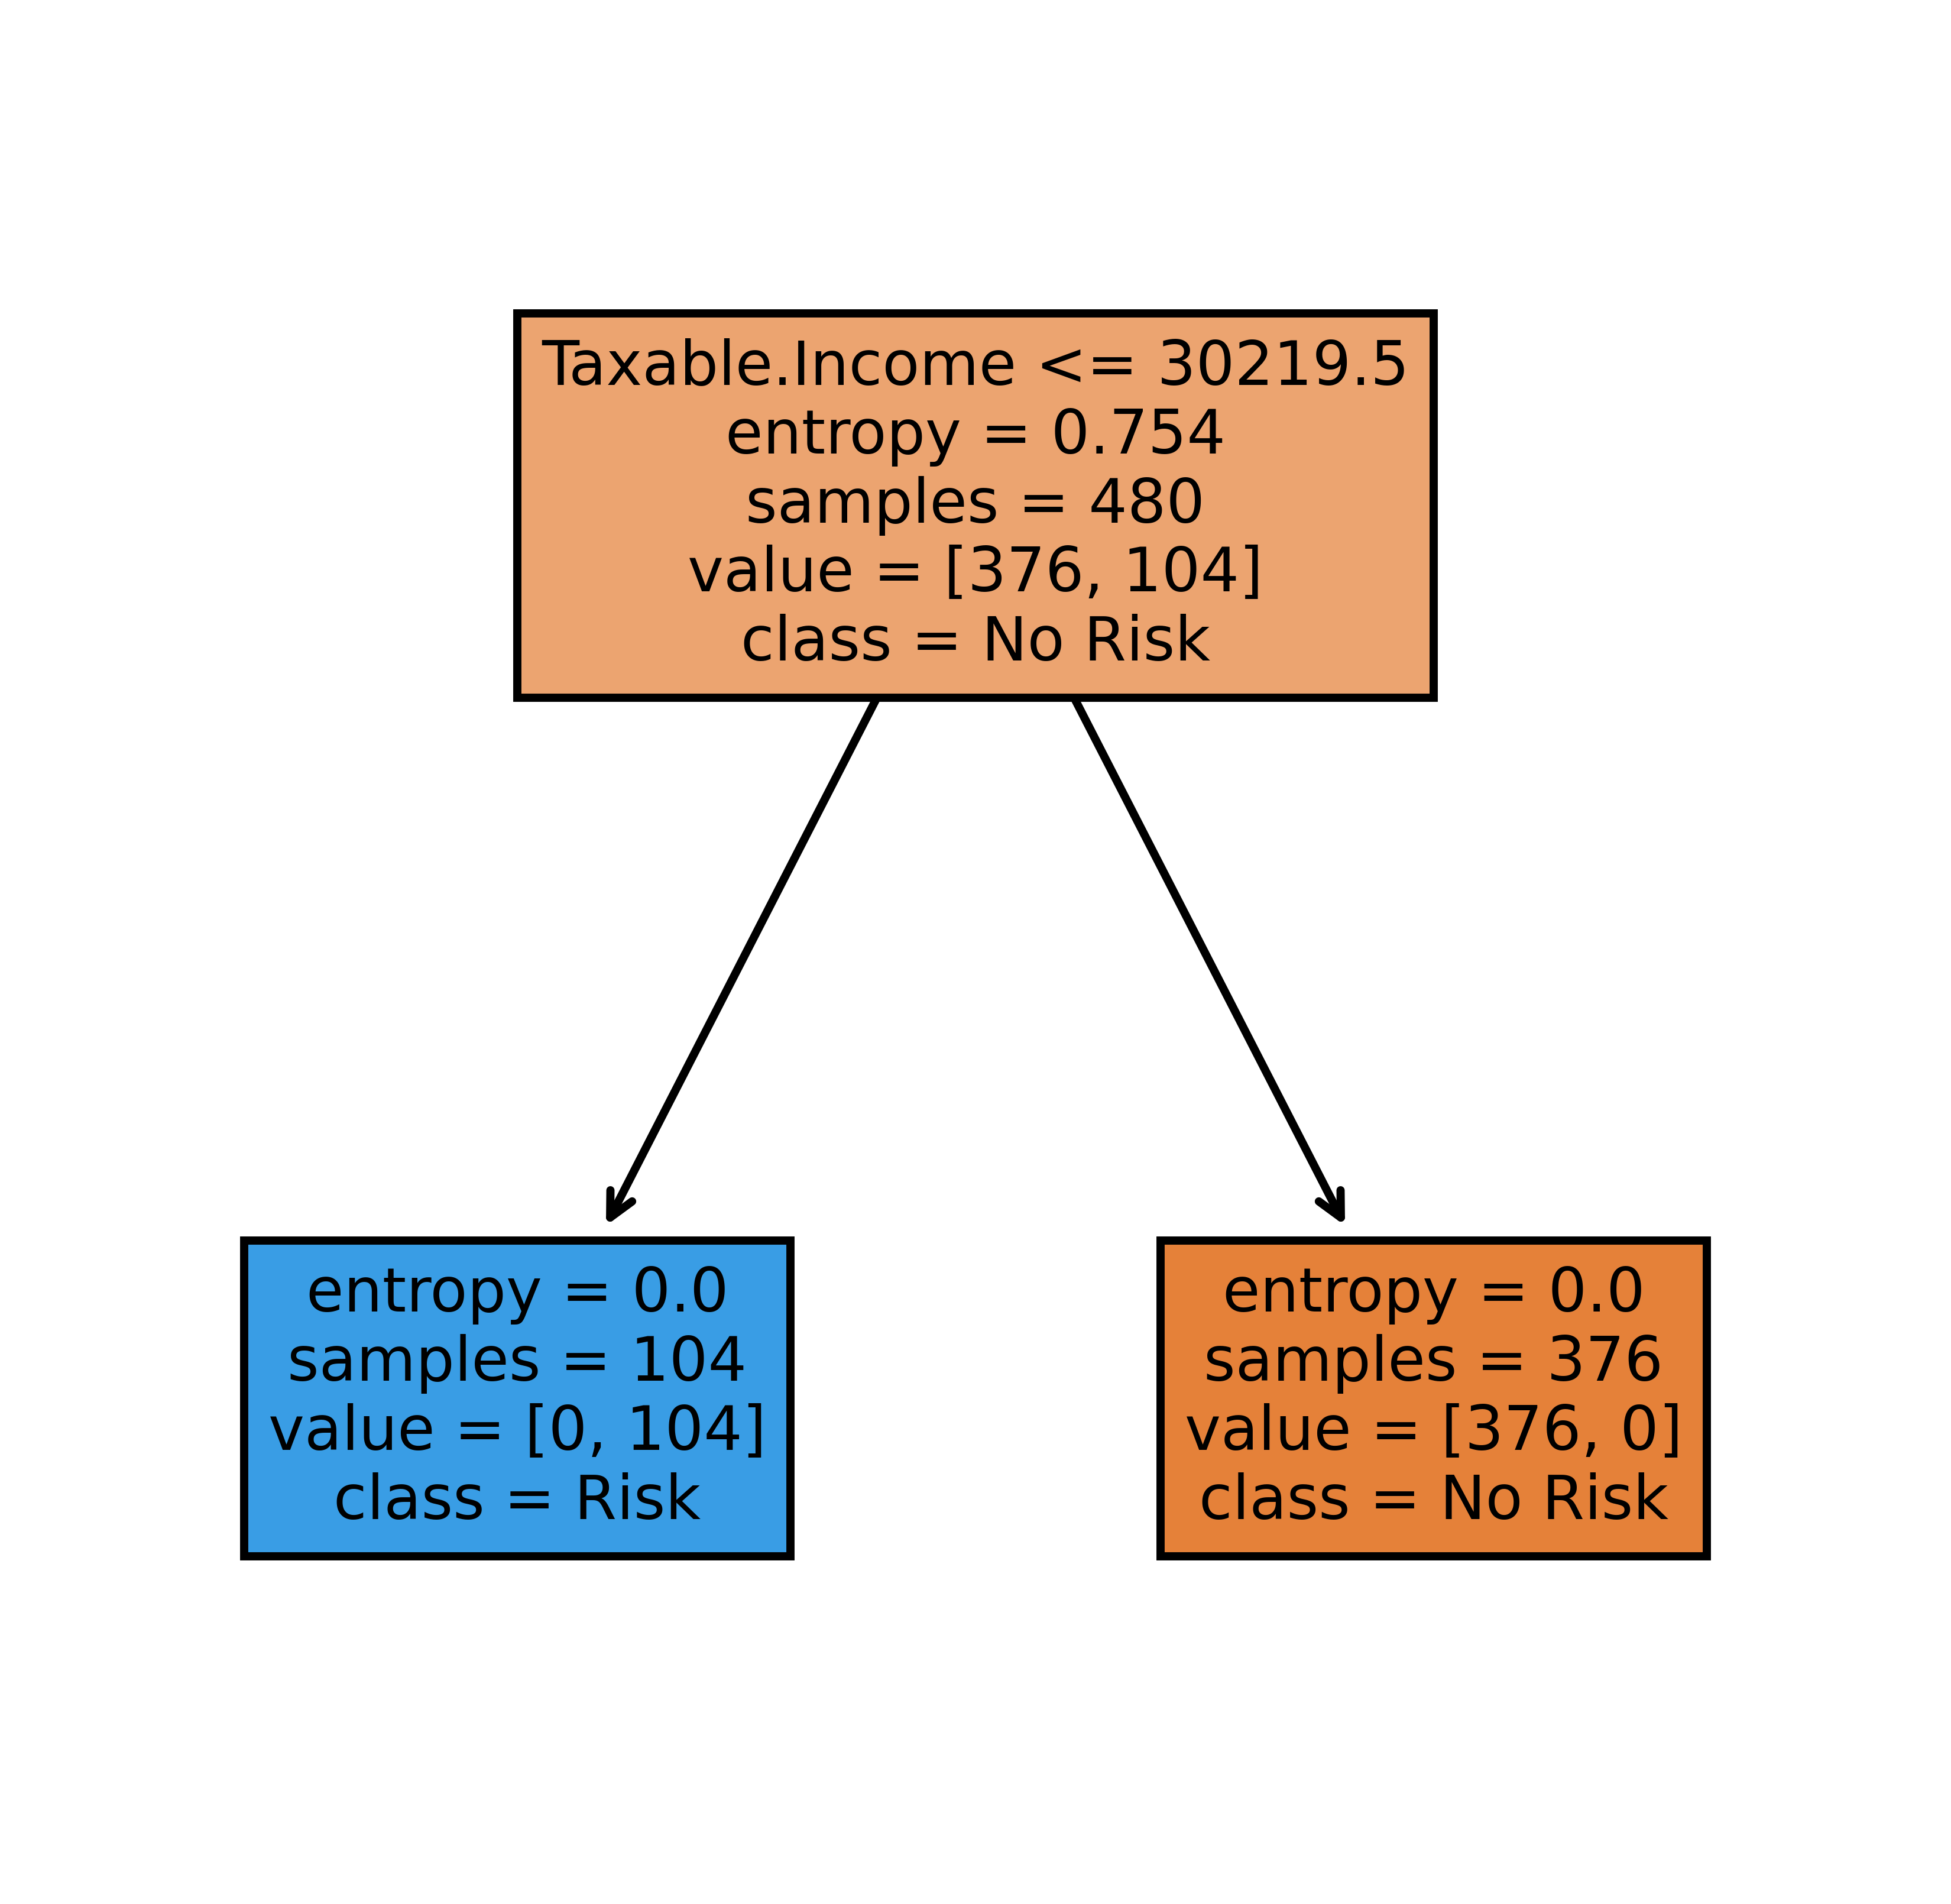

In [34]:
# Plotting decision tree
fn = ['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['No Risk', 'Risk']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize = (4,4), dpi=1000)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

## Accuracy

In [35]:
# Accuracy using entropy criteria
print(classification_report(pred2,y_test))
print('='*60)
print('Accuracy is :',metrics.accuracy_score(pred2,y_test))
print('='*60)
print('Confusion Matrix :',confusion_matrix(pred2,y_test))
print('='*60)

              precision    recall  f1-score   support

     No Risk       0.99      1.00      0.99        99
        Risk       1.00      0.95      0.98        21

    accuracy                           0.99       120
   macro avg       0.99      0.98      0.99       120
weighted avg       0.99      0.99      0.99       120

Accuracy is : 0.9916666666666667
Confusion Matrix : [[99  0]
 [ 1 20]]


### Both criteria has almost same accuracy